In [4]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

plt.style.use('bmh')

### EXTRACTING THE DATA 

In [5]:
# Extract/Read the dataset from its storage folder

df = pd.read_csv(r"C:\Users\shopinverse\Documents\Python Datasets\train.csv")

In [6]:
#Examine the first five rows of the dataset

df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
#Examine the last five rows of the dataset

df.tail(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [8]:
#Examine the summary of the dataset in details

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Note that there are some features with huge missing or incomplete data which includes: Alley, FireplaceQu, PoolQC, Fence, MasVnrType & MiscFeature 

In [9]:
# Checking the first 60 features for missing or incomplete data.

df.isna().sum().head(60)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley           1369
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType       872
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

Above confirms my earlier observation about some features having high missing or incomplete data. These features include: Lotfrontage, Alley, MasVnrType and FireplaceQu

In [10]:
# Checking the last 39 features with missing or incomplete data.

df.isna().sum().tail(39)

Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           1453
Fence            1179
MiscFeature      1406
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
dtype: int64

Further observation reveal more features have high missing or incomplete data. These features include: PoolQC, Fence and MiscFeature.

In [11]:
# Check for duplicate features

df.duplicated().sum()

0

There are no features with duplicate data. 

In [12]:
# Statistical description of ONLY catergorical features (Transpose to view all in dataset)

df.describe(exclude=np.number).T

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


In [13]:
# Statistical describtion of ONLY numerical features (Transpose to view all in dataset)

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


### OBSERVATION:

From the Data Summary, we can identify some features that won't be relevant in our Exploratory Data Analysis, as there have a huge amount of missing or incomplete values.
- Alley
- PoolQC etc.
-  Being a multi-dimension dataset, we have observed some redundant features. 
-  We will remove the feature `Id` and the features with 30% or less `NaN` values.

### DATA CLEANING
From our observations above, we will clean the dataset by:
- Dropping off redundant features like the 'Id' column
- Dropping off any feature that has more than 30% missing datapoint. 

In [14]:
# Identifying features that have at least 30% datapoints

df.isnull().mean() <= (1 - 0.3)

Id               True
MSSubClass       True
MSZoning         True
LotFrontage      True
LotArea          True
                 ... 
MoSold           True
YrSold           True
SaleType         True
SaleCondition    True
SalePrice        True
Length: 81, dtype: bool

In [15]:
# Cleaning the dataset.
# Check for columns having at least 30% missing datapoints and assign them to a new dataset - df2

df2 = df.loc[:, df.isnull().mean() <= (1 - 0.3)]

# Dropoff redundant feature 'Id' from the new dataset - df2
df2 = df2.drop('Id',axis=1)

In [16]:
# Confirming the dropped off features not in the new dataset - df2

for c in df.columns:
    if c not in df2.columns:
        print(f"Dropped Column:{c}")

Dropped Column:Id
Dropped Column:Alley
Dropped Column:PoolQC
Dropped Column:Fence
Dropped Column:MiscFeature


In [17]:
df2.head(60)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2008,WD,Normal,118000


We now have a clean dataset void of incomplete, missing or redundant data to enable us begin the EDA. 

### EXPLORATORY DATA ANALAYSIS
- I'll use various visualization techniques to perform the Exploratory Data Analysis on the cleaned dataset. 
- Specifically, I'll employ Univariate, Bivariate and Multivariate Visusalization techniques on the cleaned dataset to reveal hidden patterns and insights which will assist both technical & non-technical stakeholders make informed business decisions concerning house prices in Ames, Iowa, USA.

**UNIVARIATE ANALYSIS**

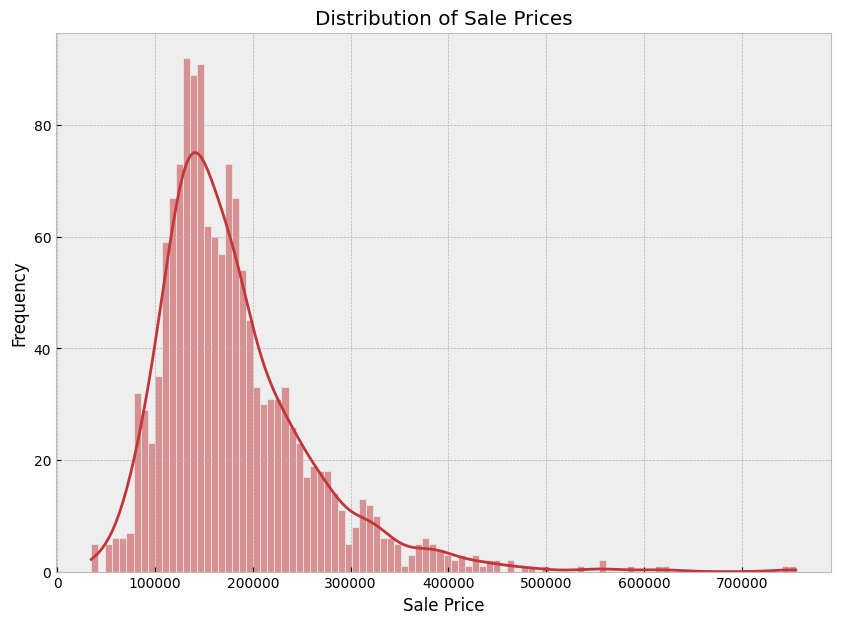

In [18]:
# Univariate distribution of the dependent feature (price of house)

''' Choose a color palette '''
palette = 'RdBu'

plt.figure(figsize=(10, 7))
''' Set the color palette '''
sb.set_palette(palette)  

sb.histplot(df2['SalePrice'], bins=100, kde=True)
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

**Observation:**
- From the Sales Price feature distribution above, we can see that prices are positively skewed.
- There are some Sales price outliers in the dataset, prices of houses above 500,000

In [19]:
# Creating Categorical and Numerical features for in-depth analysis

num_feat = df2.select_dtypes(include = ['float64', 'int64'])
cat_feat = df2.select_dtypes(include = 'object')

cat_feat.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


#### Numerical Data Distribution 
I have generated an overview visualization of the numerical data distribution below. Thereafter, I will drill-down by generating individual vizualizations in order to uncover each variables relationship with sales price.

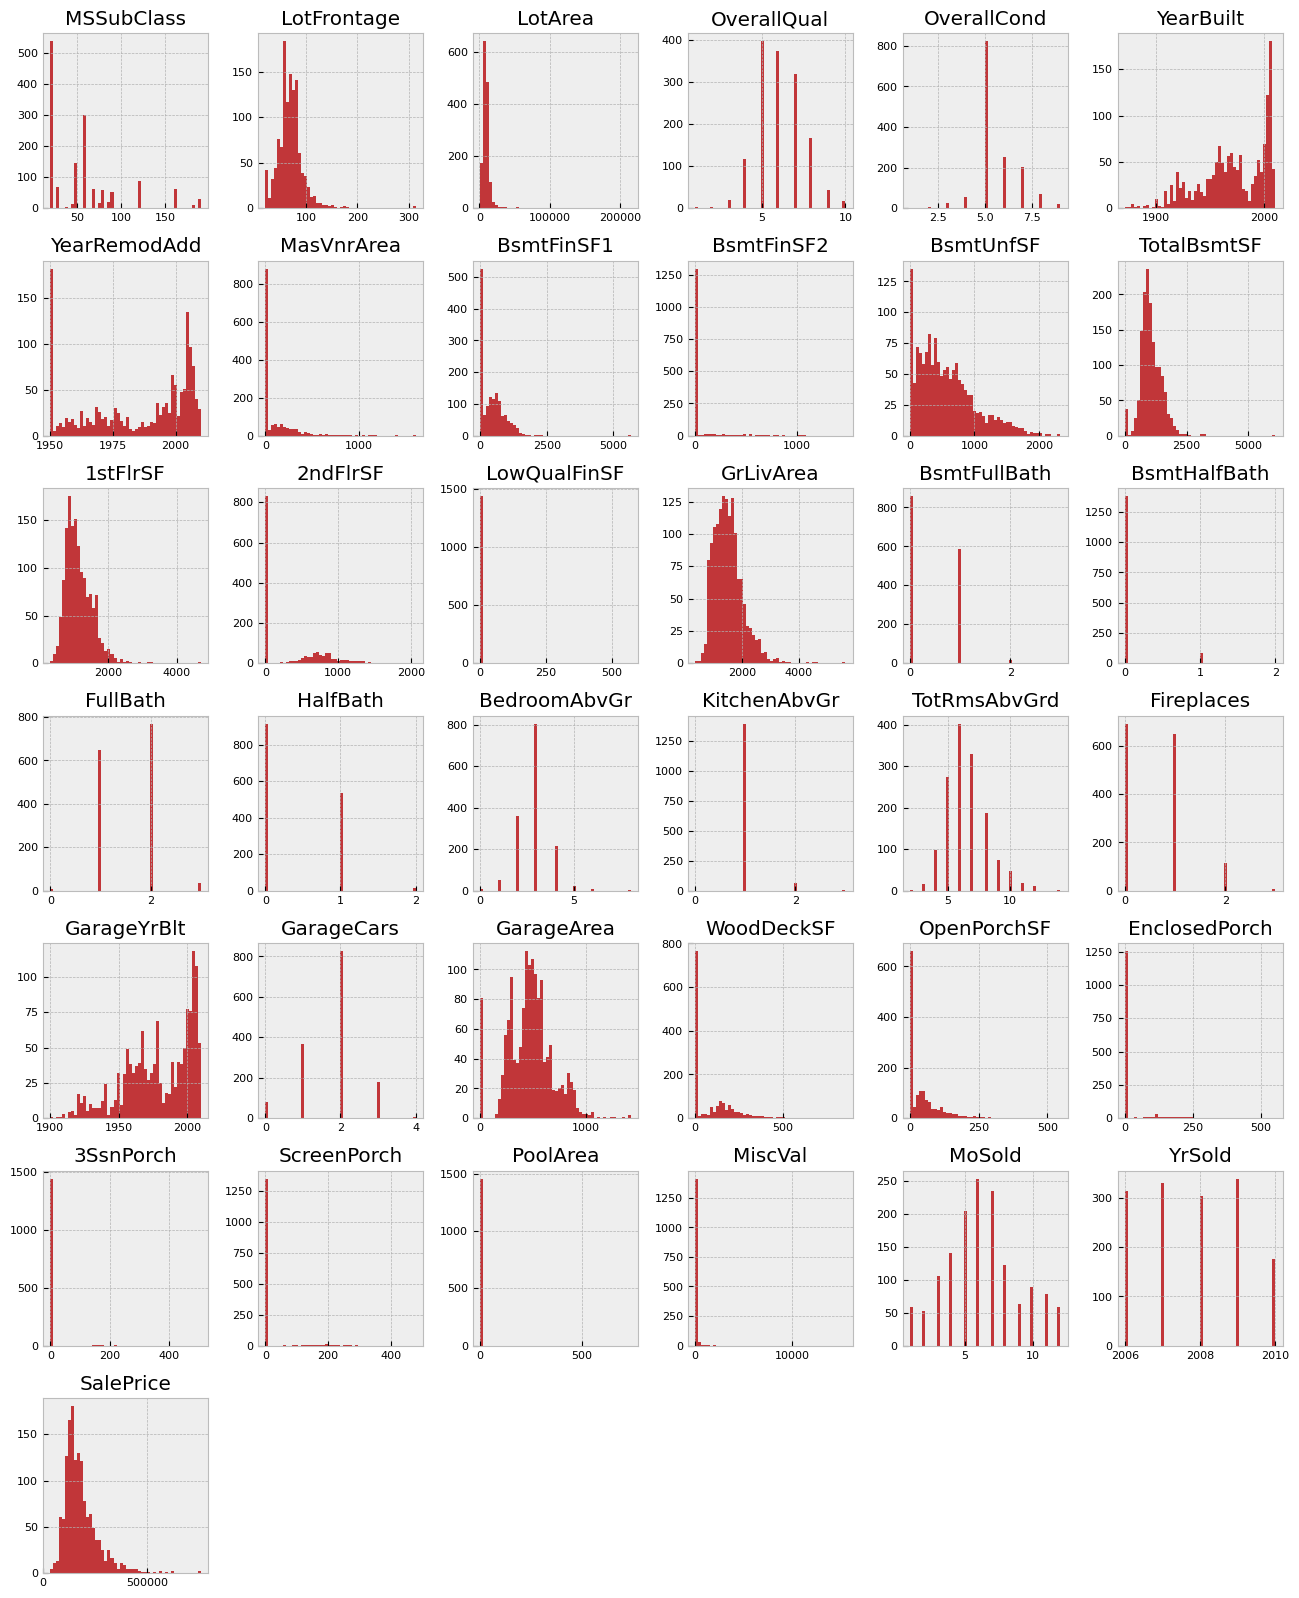

In [20]:
# Univariate distribuions of the numerical featues in the cleaned dataset. 

num_feat.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

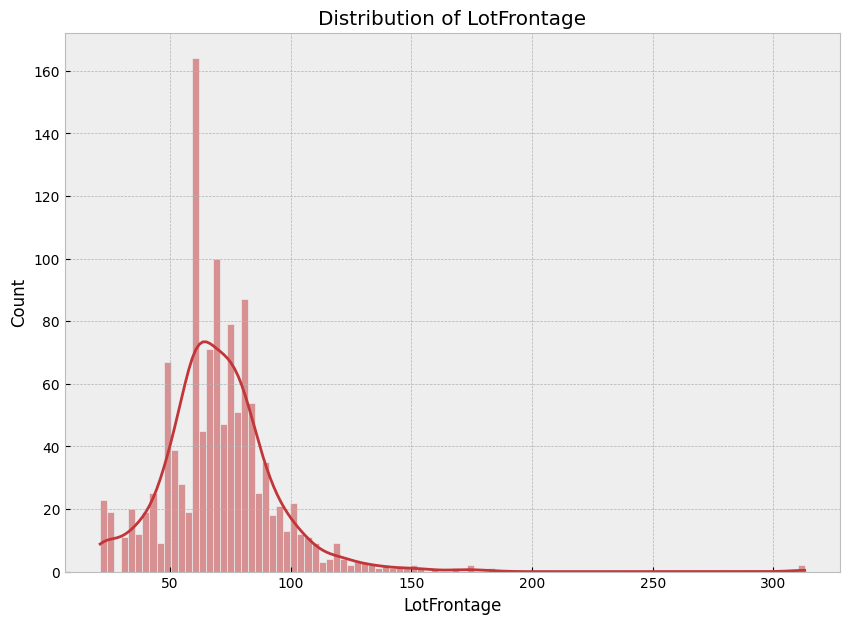

In [21]:
# Univariate distribution of the LotFrontage Feature. 

''' Choose a color palette '''
palette = 'RdBu'

plt.figure(figsize=(10, 7))
''' Set the color palette '''
sb.set_palette(palette)  

sb.histplot(df2['LotFrontage'], bins=100, kde=True)
plt.title('Distribution of LotFrontage')
plt.show()

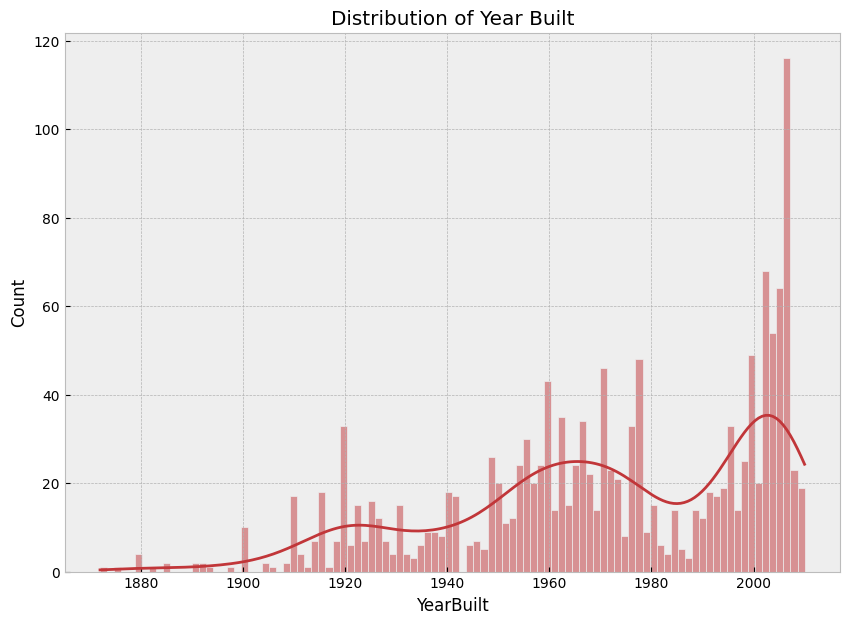

In [22]:
# Univariate distribution of the Year Built Feature.

''' Choose a color palette '''
palette = 'RdBu'

plt.figure(figsize=(10, 7))
''' Set the color palette '''
sb.set_palette(palette)  

sb.histplot(df2['YearBuilt'], bins=100, kde=True)
plt.title('Distribution of Year Built');


The feature shows a negatively skewed visualization and depicts more houses were built as the years progressed with the highest count of less than 200 houses after the year 2000.

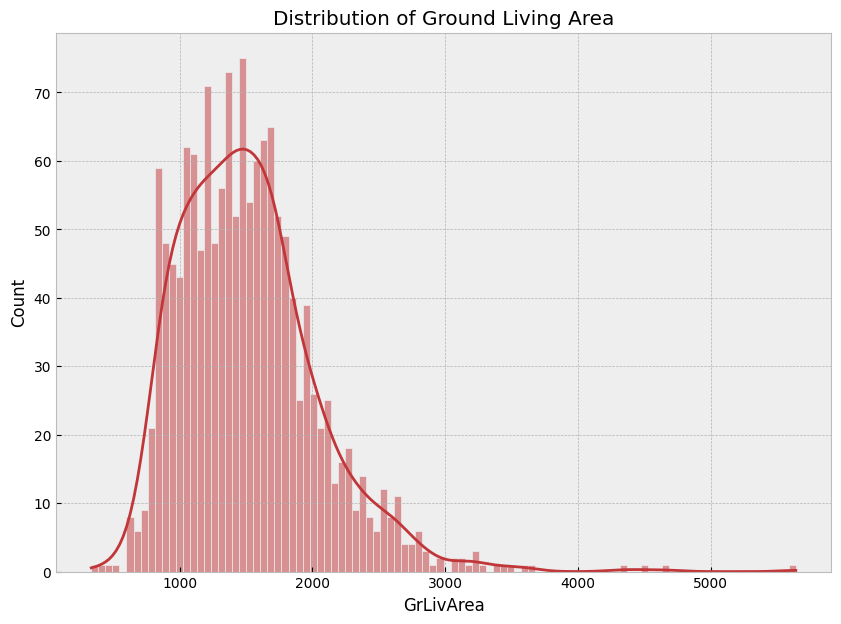

In [23]:
# Univariate distribution of the Ground Living Area Feature.

''' Choose a color palette '''
palette = 'RdBu'

plt.figure(figsize=(10, 7))
''' Set the color palette '''
sb.set_palette(palette)  

sb.histplot(df2['GrLivArea'], bins=100, kde=True)
plt.title('Distribution of Ground Living Area');

The feature shows a positively skewed visualization for the Ground Living Area with outliers above 3000. 

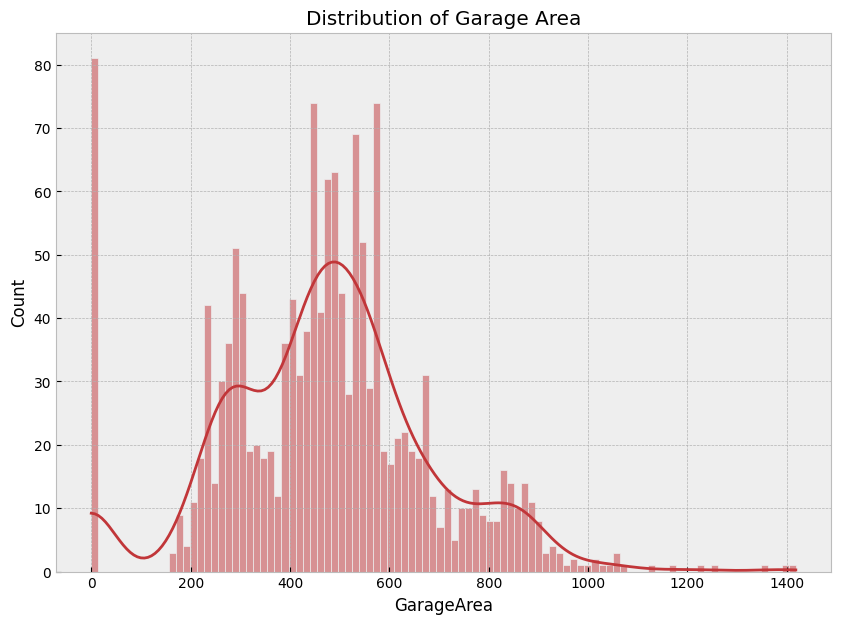

In [24]:
# Univariate distribution of the Garage Area Feature.

''' Choose a color palette '''
palette = 'RdBu'

plt.figure(figsize=(10, 7))
''' Set the color palette '''
sb.set_palette(palette)  

sb.histplot(df2['GarageArea'], bins=100, kde=True)
plt.title('Distribution of Garage Area');

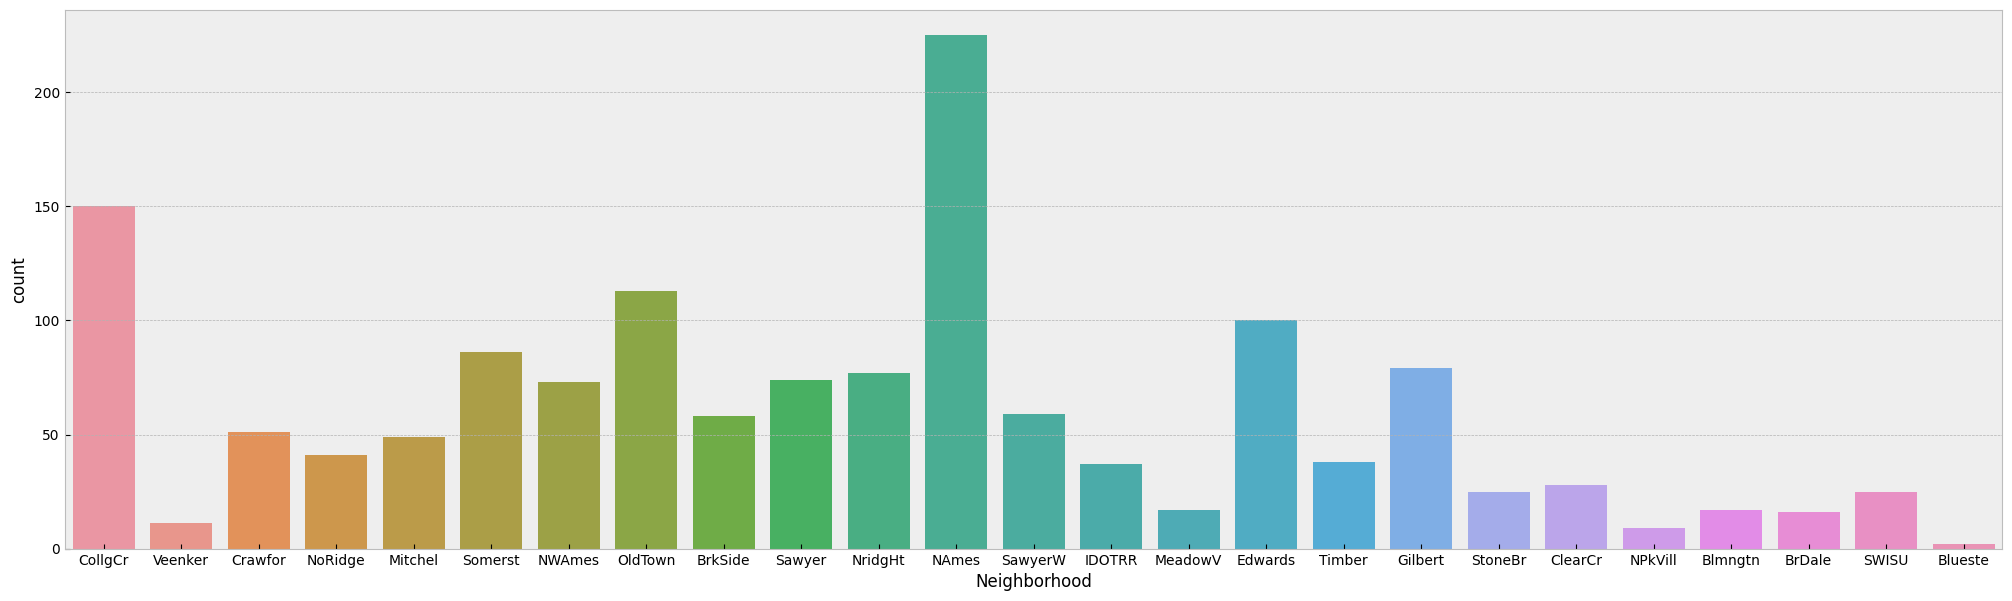

In [25]:
# Univariate distribution of the Neigborhood feature

plt.figure(figsize=(25,7))
sb.countplot(x='Neighborhood',data=cat_feat);

The Viz shows the Names Neighborhood has the most number of houses with over 200 in the Ames Housing Project in Iowa while the Blueste Neighborhood had the least with less than 10 houses.  

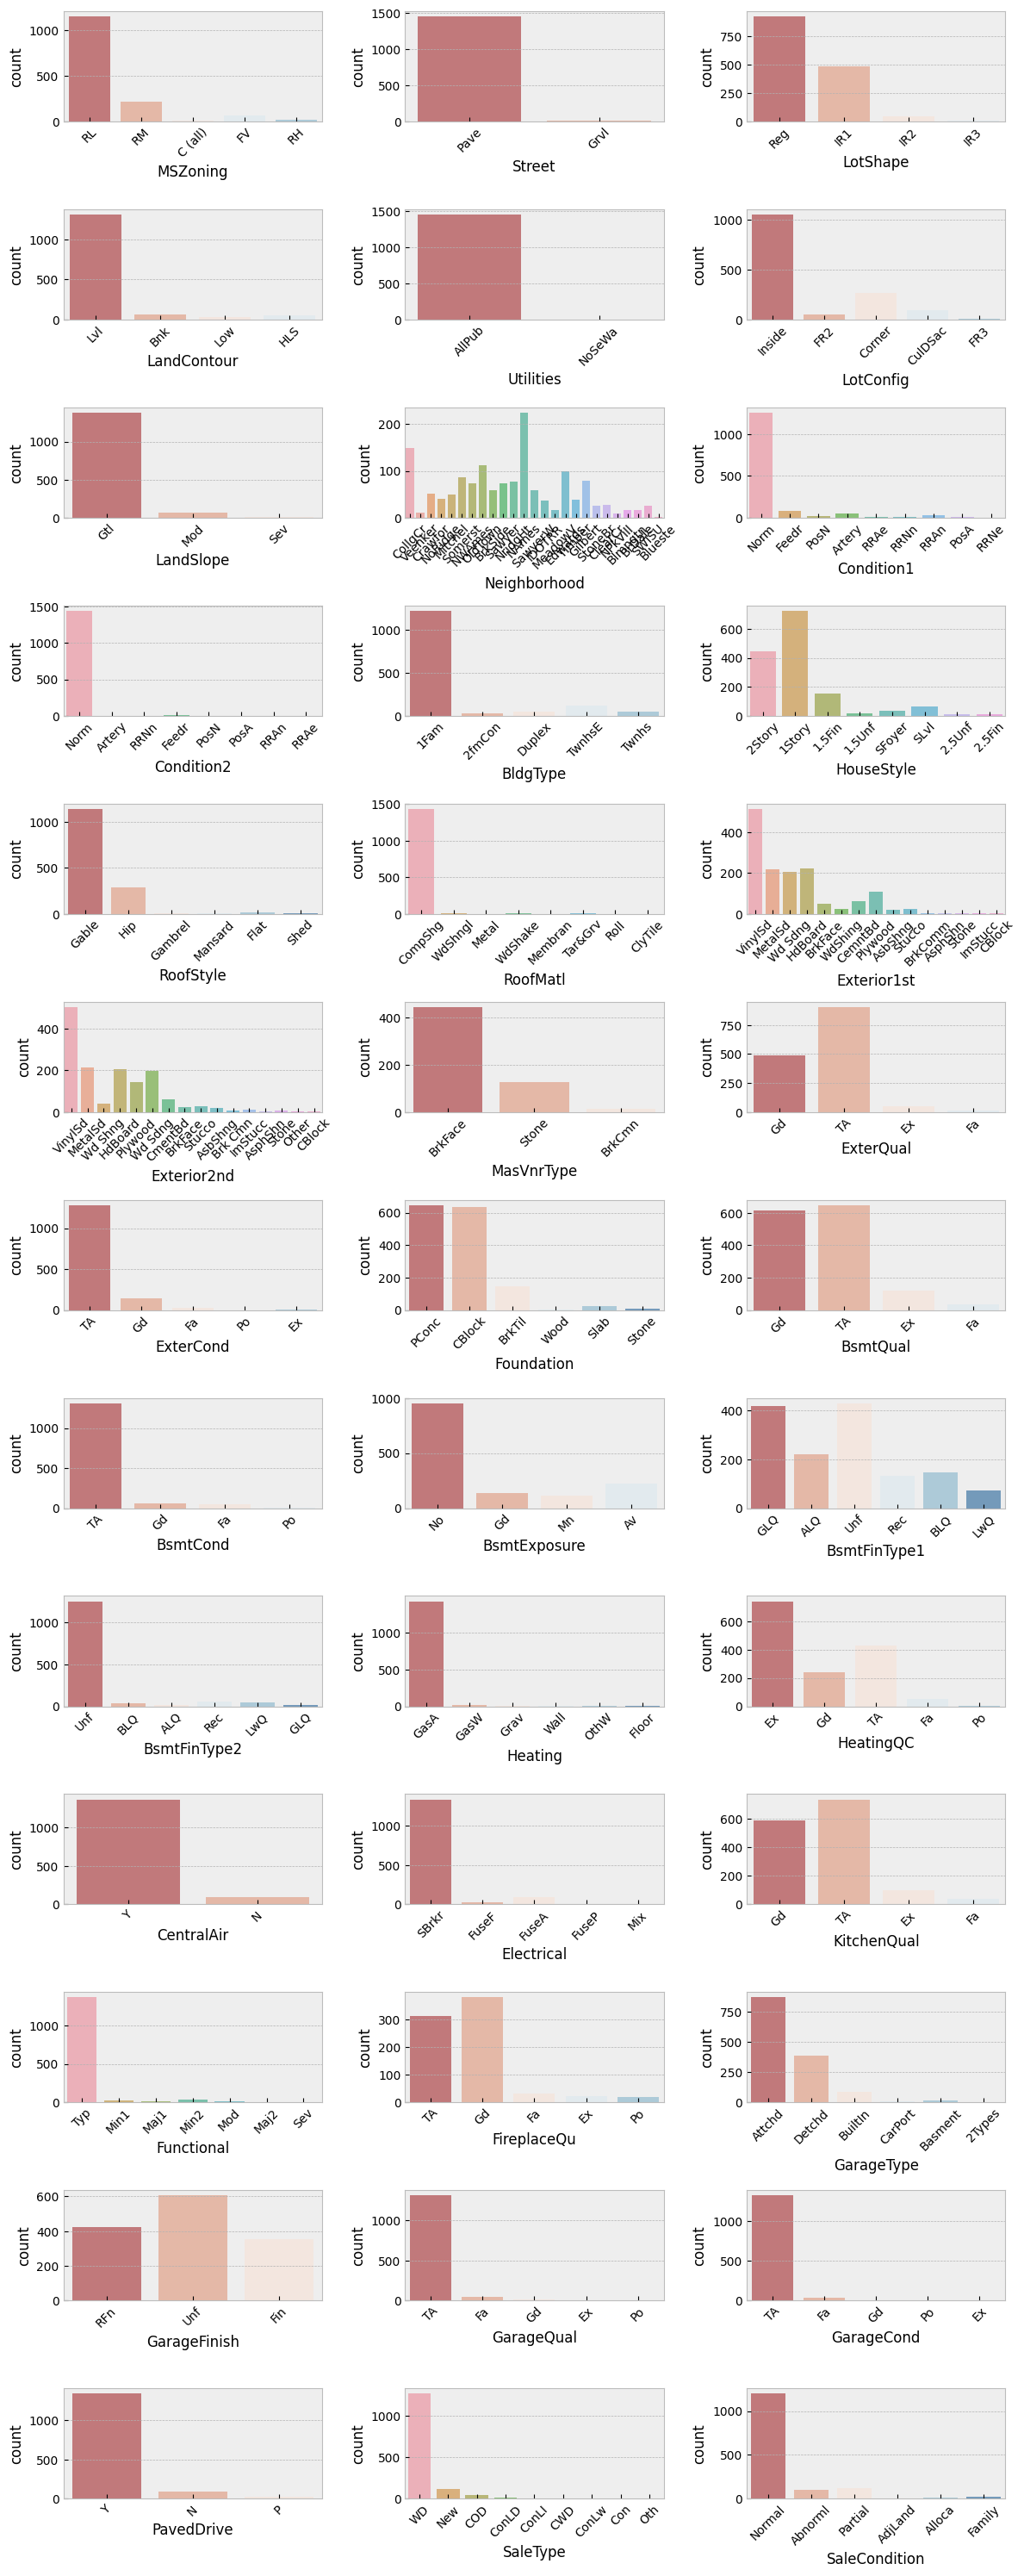

In [26]:
# Univariate plots of the other categorical features

fig, axes = plt.subplots(round(len(cat_feat.columns) / 3), 3, figsize=(12, 30))

for i, ax in enumerate(fig.axes):
    if i < len(cat_feat.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sb.countplot(x=cat_feat.columns[i], alpha=0.7, data=cat_feat, ax=ax)

fig.tight_layout();

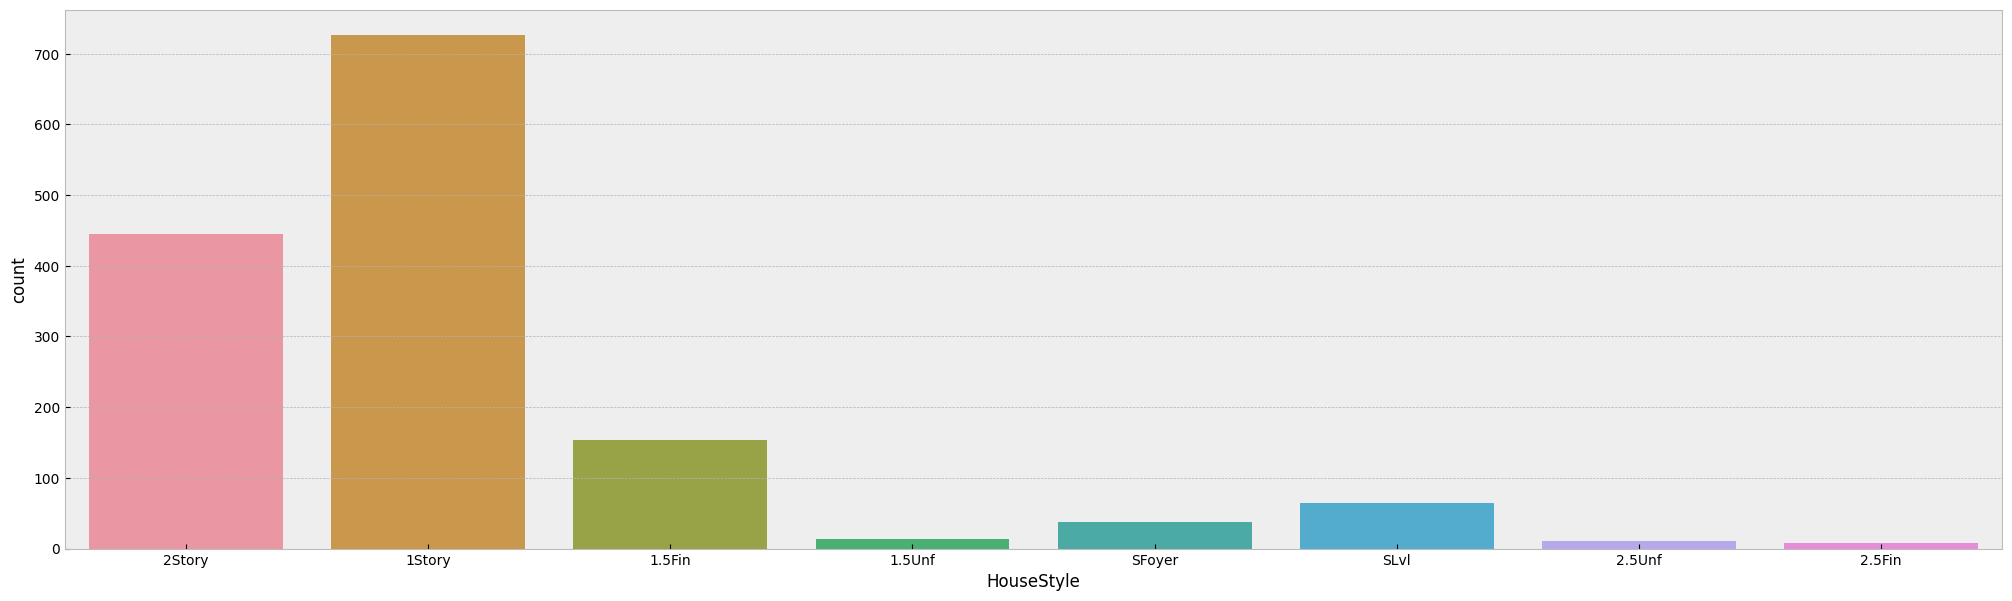

In [27]:
# Univariate distribution of the House Style feature

plt.figure(figsize=(25,7))
sb.countplot(x='HouseStyle',data=cat_feat);

There are over 700 1-Story houses in the Ames Housing Project followed by 2-Story houses numbering about 450 while the least is 2.5Fin houses numbering about 5

### BIVARIATE ANALYSIS

<Figure size 900x500 with 0 Axes>

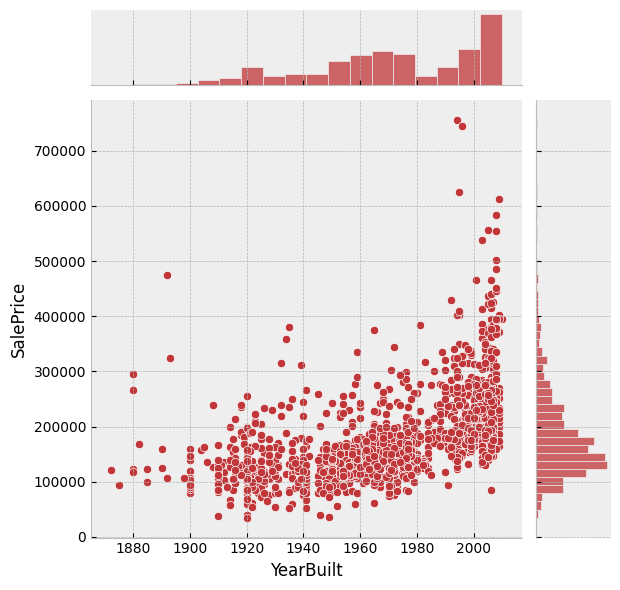

In [28]:
# Relationship between Year House was Built and Sales Price
plt.figure(figsize=(9,5))
sb.jointplot(x='YearBuilt',y='SalePrice',data=num_feat)
plt.show();

**Observation**
- There appears to be a positive linear relationship between the year a house was built and the Price of the house, this is often a good indication that the year built feature is an important feature in determing the price of a house.

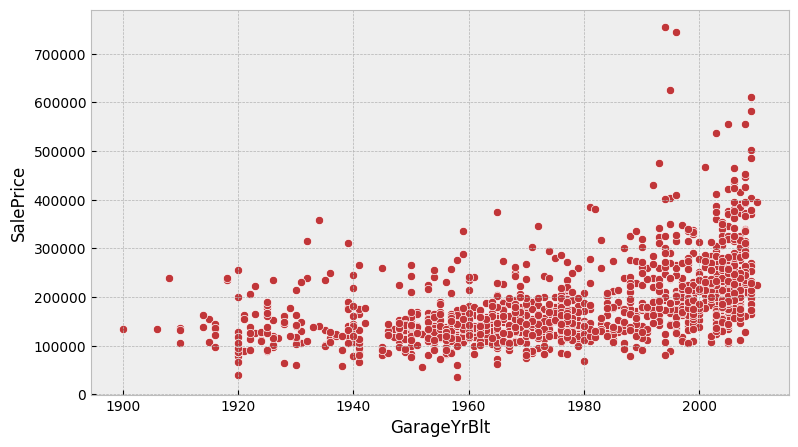

In [29]:
# Relationship between Year Garage was Built and Sales Price
plt.figure(figsize=(9,5))
sb.scatterplot(x='GarageYrBlt',y='SalePrice',data=num_feat)
plt.show();

There's also a positive linear relationship between the year a garage was built and the price of the house as shown in the above scatter plot. As the years progressed sales prices of the houses increased. 

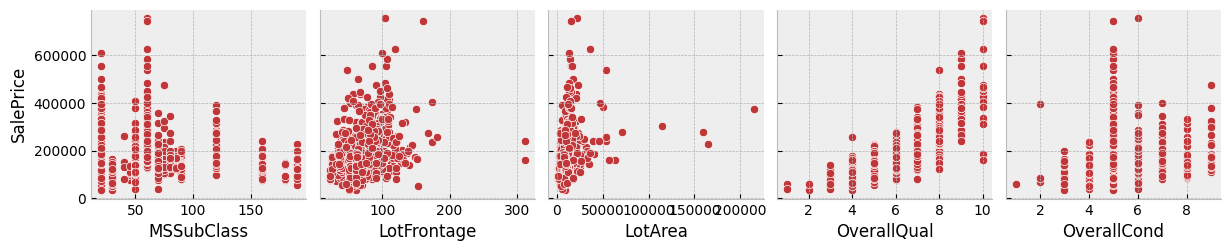

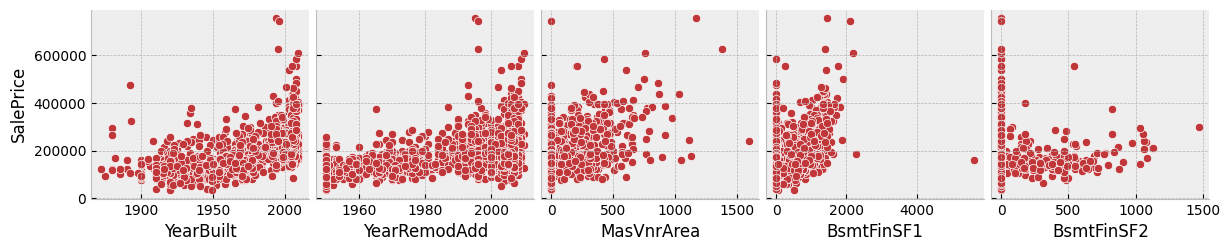

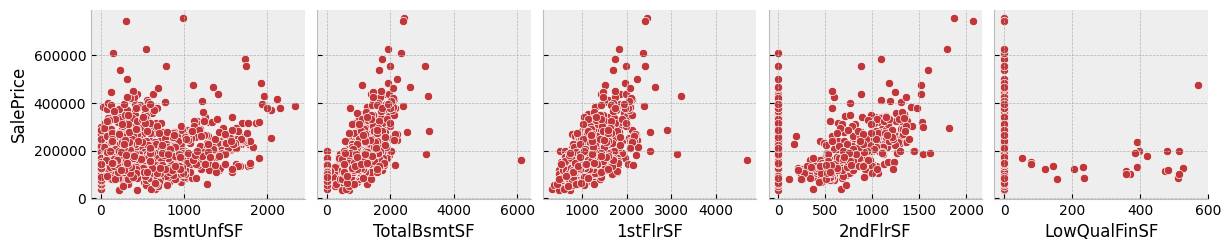

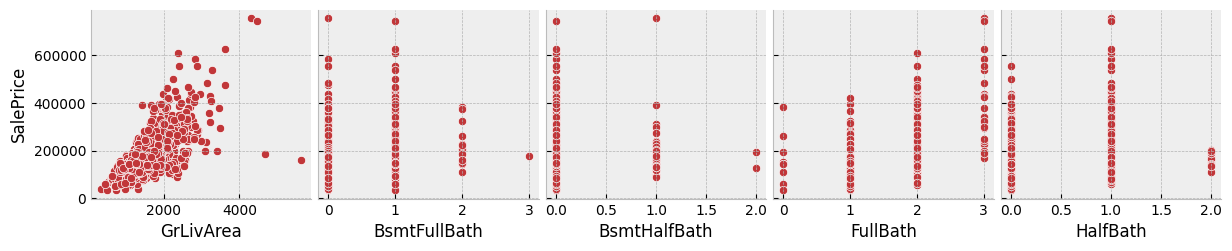

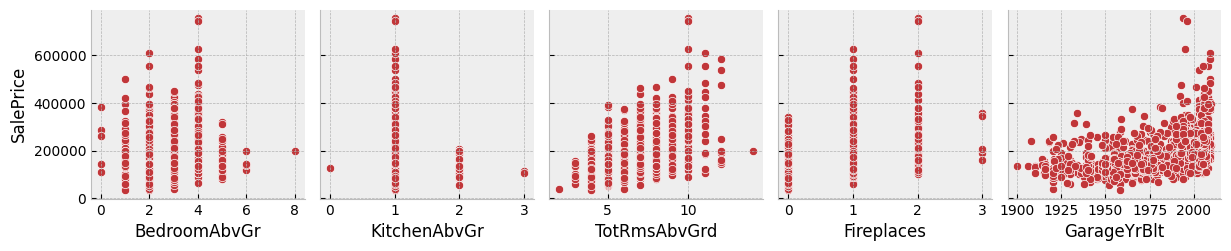

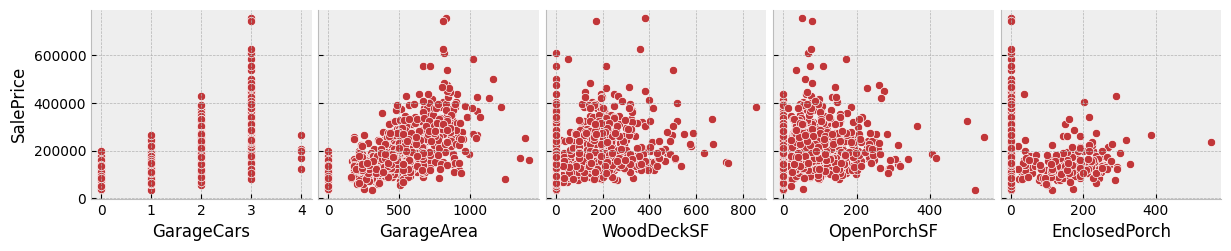

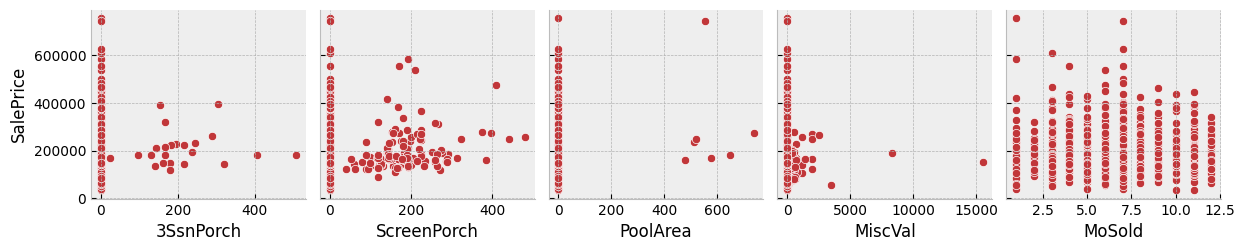

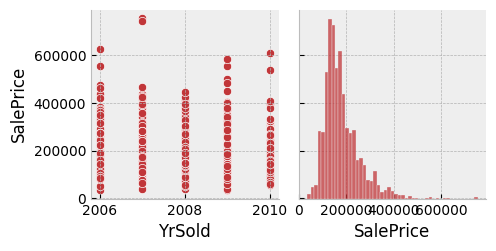

In [30]:
# Bivariate plots for the other numerical features using pairplot

for i in range(0, len(num_feat.columns), 5):
    sb.pairplot(data=num_feat,
                x_vars=num_feat.columns[i:i+5],
                y_vars=['SalePrice'])

#### Correlation
Now we'll try to find which features are strongly correlated with sale price feature, as these features may be good indicators
in determing the price of a house

In [31]:
# Creating im_feat(important features) to investigate correlation between numerical features and target variable (Sales Price)

corr_feat = num_feat.corr()['SalePrice']
corr_feat

MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePrice, dtype: float64

**Observation:**
- We have identified some relationships. Most of them seems to have a linear relationship with the target feature - Sales Price

In [32]:
# Highlighting the important features that have a strong linear relationship with the target valiable, Sales Price. 

im_feat = corr_feat[corr_feat > 0.5]
im_feat

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64

Above are very important features that have very strong positive correlation (relationship) with the target feature - Sales Prices

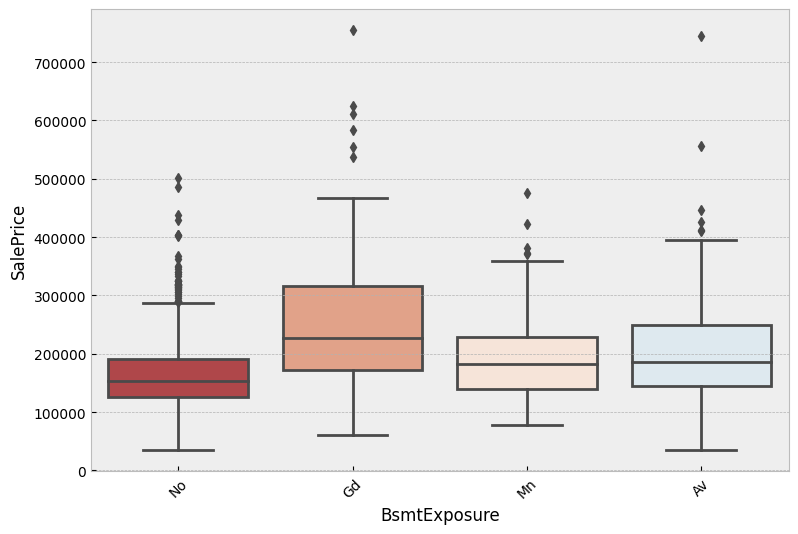

In [33]:
# Bivariate distribution of the BsmtExposure vs Sale Price

plt.figure(figsize = (9, 6))
ax = sb.boxplot(x='BsmtExposure', y='SalePrice', data=df2)
plt.xticks(rotation=45);

In context of median price, the garden level walls for Gd House-type was the highest at over 200,000 followed by Av House-type at about 190,000 while No House-type had the least median price at about 160,000. All house types had price outliers with the hightest price at about 750,000.  

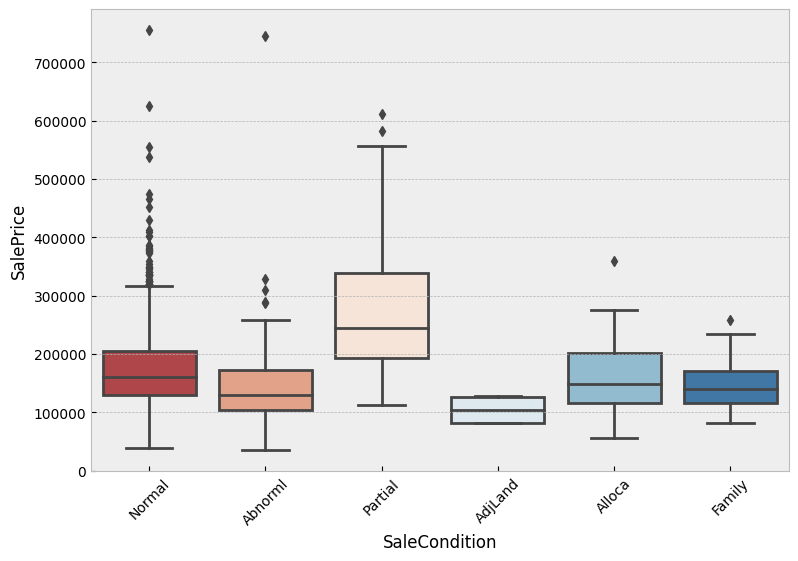

In [34]:
plt.figure(figsize = (9, 6))
ax = sb.boxplot(x='SaleCondition', y='SalePrice', data=df)
plt.xticks(rotation=45);

In terms of Sale Condition, Partial housing type had the largest data points as well as highest median price at about 250,000 while AdjLand had the least data points and median price at 100,000.  

### MULTIVARIATE ANALYSIS

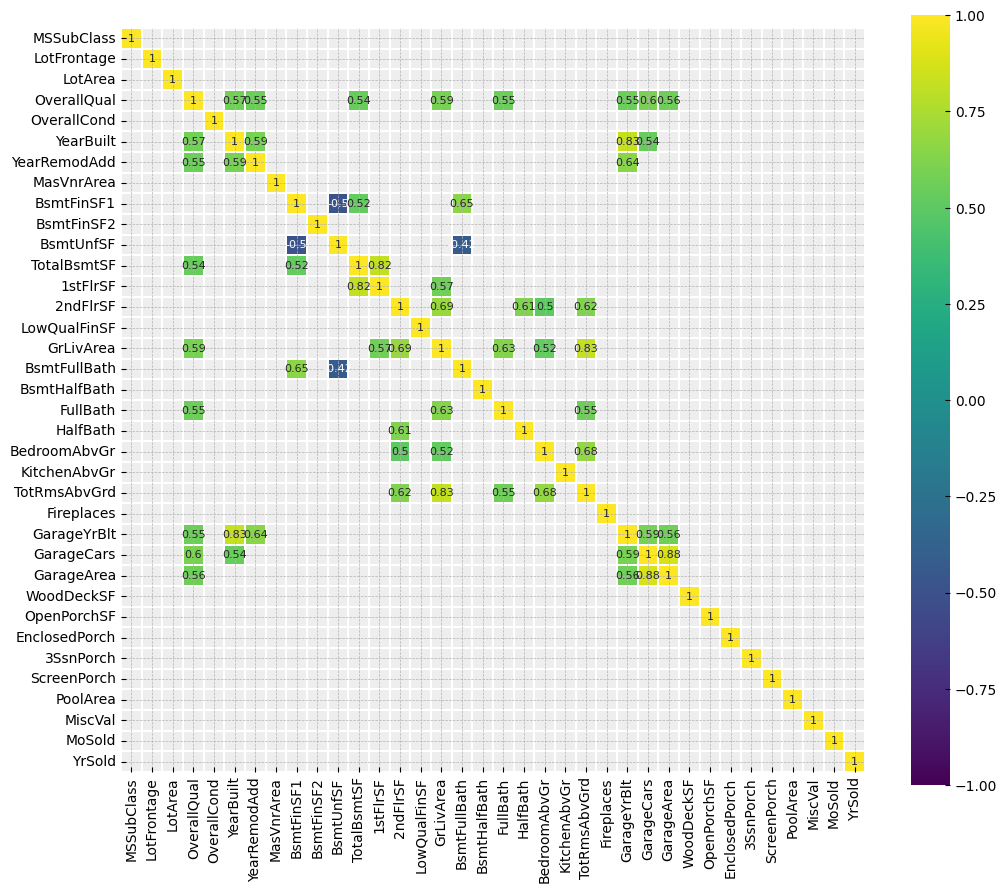

In [35]:
corr = num_feat.drop('SalePrice', axis=1).corr() 
plt.figure(figsize=(12, 10))

sb.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

**observations**
- A lot of features seems to be correlated between each other but some of them such as YearBuild and the GarageYrBlt

- There is a strong negative correlation between `BsmtUnfSF` (Unfinished square feet of basement area) and `BsmtFinSF2` (Type 2 finished square feet).

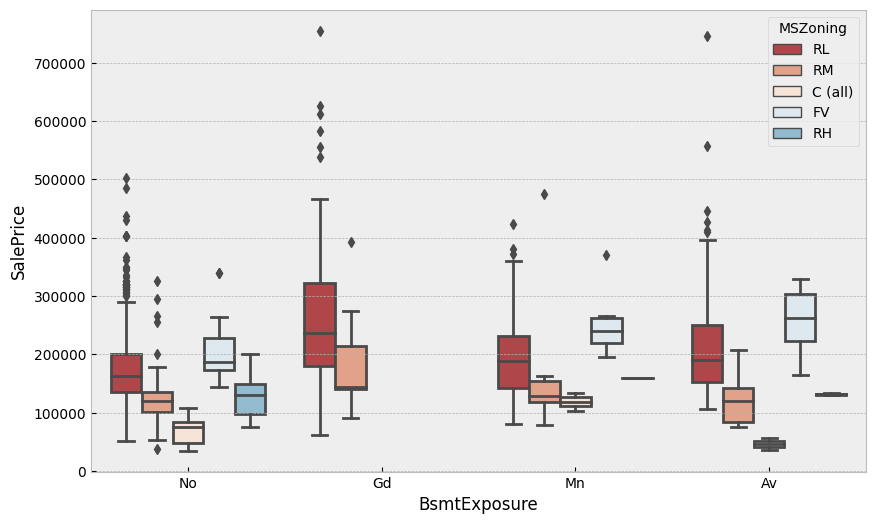

In [36]:
plt.figure(figsize=(10,6))
sb.boxplot(x='BsmtExposure',y='SalePrice',hue='MSZoning',data = df2);

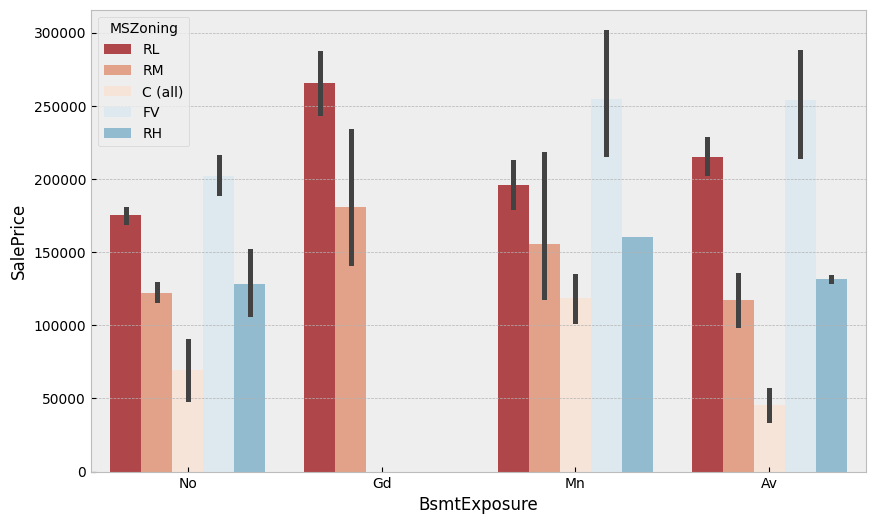

In [37]:
plt.figure(figsize=(10,6))
sb.barplot(x='BsmtExposure',y='SalePrice',hue='MSZoning',data = df2);

### Supervised ML Section 

##### Feature Engineering:

* Data Cleaning
* Outlier detection and handling
* Feature encoding
* Feature normalization or standardization (Scaling)
* Feature segmentation
* Cross validation (data splitting)

##### Model Building:

* Build ML Model
* Evaluate ML model performance

##### Recommendations & Conclusion

Worthy to mention that during cleaning the dataset - I have handled the issue of missing data by dropping off features with less than 30% data points, checked also for duplicate data and found none and lastly, dropped off redundant or irrelevant feature (ID column). However, I have checked for outliers and noticed same in the dataset. I will proceed with building my model and test same thereafter. If from the model evaluation I notice that the accuracy of the model is affected by the presence of outliers in the dataset, I will then handle the outliers and rebuild the model to ensure an optimal performance. 

In [39]:
# Identifying null data points 
df2.isna().sum().head(60)

MSSubClass        0
MSZoning          0
LotFrontage     259
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType      872
MasVnrArea        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinSF1        0
BsmtFinType2     38
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0


In [42]:
# Checking the LotFrontage feature in more details 
df2['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

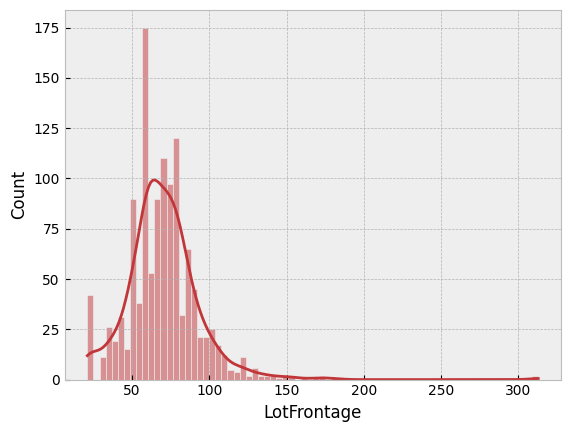

In [44]:
# Visualizing the LotFrontage feature in more details 
sb.histplot(df['LotFrontage'], kde=True);

There are outliers and missing data in the feature. For features with missing or incomplete data, it's advisable to use Median and not Mean function to replace the missing values by using the SimpleImputer function to replace all missing datapoints. 

In [49]:
# Replacing missing data points in all numerical features using the SimpleImputer function and median strategy. 
from sklearn.impute import SimpleImputer 

imputer=SimpleImputer(strategy='median')
num_feat=pd.DataFrame(imputer.fit_transform(num_feat), columns=num_feat.columns)

num_feat


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,...,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0
1,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,...,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0
2,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,...,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0
3,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,...,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0
4,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,...,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60.0,62.0,7917.0,6.0,5.0,1999.0,2000.0,0.0,0.0,0.0,...,0.0,40.0,0.0,0.0,0.0,0.0,0.0,8.0,2007.0,175000.0
1456,20.0,85.0,13175.0,6.0,6.0,1978.0,1988.0,119.0,790.0,163.0,...,349.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2010.0,210000.0
1457,70.0,66.0,9042.0,7.0,9.0,1941.0,2006.0,0.0,275.0,0.0,...,0.0,60.0,0.0,0.0,0.0,0.0,2500.0,5.0,2010.0,266500.0
1458,20.0,68.0,9717.0,5.0,6.0,1950.0,1996.0,0.0,49.0,1029.0,...,366.0,0.0,112.0,0.0,0.0,0.0,0.0,4.0,2010.0,142125.0


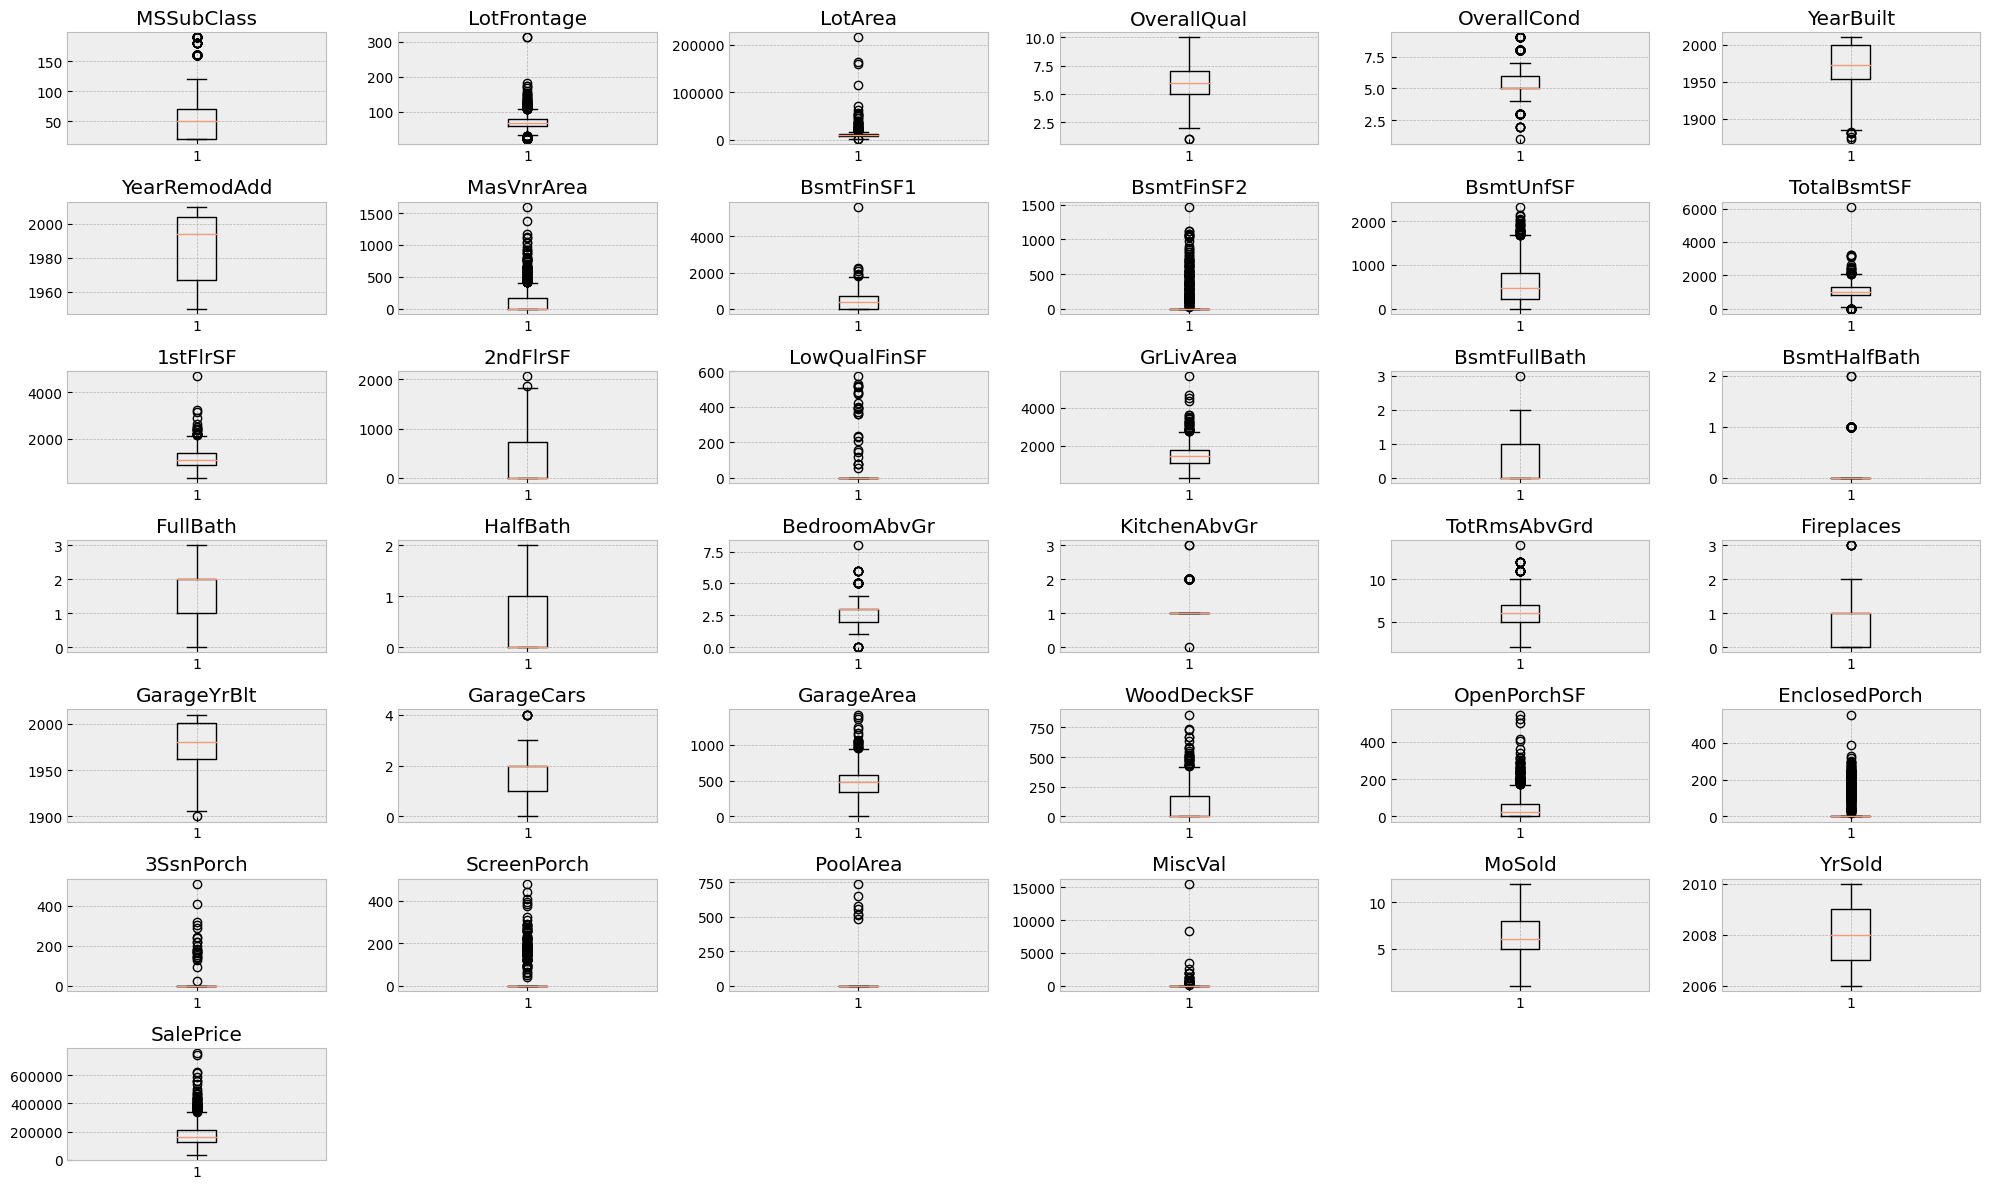

In [55]:
# Outlier detection & visualization for all numerical features in the dataset. 

plt.figure(figsize=(20,12))
for x, v in enumerate (num_feat):
    plt.subplot(7,6, x+1)
    plt.boxplot(num_feat[v], whis=1.5)
    plt.tight_layout()
    plt.title(v)
plt.show();

I have used the boxplot function in the matplotvib library to plot the outliers in all numerical features in the dataset as seen above. Since I want to use this model as my base model, I will proceed to build and train the model. If the accuracy and performance metrics are not optimal, I will revert to remove the outliers and retrain the model for optimal performance. 

In [71]:
# Re-merge both numerical and catgorical features in the dataset to form a new dataset for building the model.

new_data= pd.concat([cat_feat, num_feat], axis=1)
new_data

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,0.0,40.0,0.0,0.0,0.0,0.0,0.0,8.0,2007.0,175000.0
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,349.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2010.0,210000.0
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,0.0,60.0,0.0,0.0,0.0,0.0,2500.0,5.0,2010.0,266500.0
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,366.0,0.0,112.0,0.0,0.0,0.0,0.0,4.0,2010.0,142125.0


I now have both cat and num features concatenated togather as a new dataset

In [60]:
# Segmenting data into features and target label.

x=new_data.drop('SalePrice', axis=1)
target=new_data['SalePrice']


In [61]:
x.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0


In [62]:
target

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1460, dtype: float64

In [74]:
# Encode categorical dataset.

from sklearn.preprocessing import LabelEncoder

''' Method Initialization '''
encoder=LabelEncoder()

''' Looping for columns except survived '''
for c in x.columns[0:]:
    if (x[c].dtype == 'object'):
        x[c]=encoder.fit_transform(x[c])
    else:
        x[c]=x[c]


In [114]:
x

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.7,0.0,0.0,...,0.281573,0.000000,0.529412,0.0,0.0,0.0,0.0,0.0,-1.333333,0.0
1,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.2,-1.0,0.0,...,-0.082816,1.773810,-0.367647,0.0,0.0,0.0,0.0,0.0,-0.333333,-0.5
2,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-0.7,0.0,0.0,...,0.530021,0.000000,0.250000,0.0,0.0,0.0,0.0,0.0,1.000000,0.0
3,0.0,0.0,-1.0,0.0,0.0,-2.0,0.0,-0.6,0.0,0.0,...,0.670807,0.000000,0.147059,272.0,0.0,0.0,0.0,0.0,-1.333333,-1.0
4,0.0,0.0,-1.0,0.0,0.0,-1.0,0.0,0.3,0.0,0.0,...,1.474120,1.142857,0.867647,0.0,0.0,0.0,0.0,0.0,2.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.4,0.0,0.0,...,-0.082816,0.000000,0.220588,0.0,0.0,0.0,0.0,0.0,0.666667,-0.5
1456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,...,0.082816,2.077381,-0.367647,0.0,0.0,0.0,0.0,0.0,-1.333333,1.0
1457,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.6,0.0,0.0,...,-0.944099,0.000000,0.514706,0.0,0.0,0.0,0.0,2500.0,-0.333333,1.0
1458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.993789,2.178571,-0.367647,112.0,0.0,0.0,0.0,0.0,-0.666667,1.0


In [83]:
# Scale dataset using the RobustScaler function in sklearn library

from sklearn.preprocessing import RobustScaler

''' initialize the scaler variable with the RobustScaler function '''
scaler=RobustScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

x

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.7,0.0,0.0,...,0.281573,0.000000,0.529412,0.0,0.0,0.0,0.0,0.0,-1.333333,0.0
1,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.2,-1.0,0.0,...,-0.082816,1.773810,-0.367647,0.0,0.0,0.0,0.0,0.0,-0.333333,-0.5
2,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-0.7,0.0,0.0,...,0.530021,0.000000,0.250000,0.0,0.0,0.0,0.0,0.0,1.000000,0.0
3,0.0,0.0,-1.0,0.0,0.0,-2.0,0.0,-0.6,0.0,0.0,...,0.670807,0.000000,0.147059,272.0,0.0,0.0,0.0,0.0,-1.333333,-1.0
4,0.0,0.0,-1.0,0.0,0.0,-1.0,0.0,0.3,0.0,0.0,...,1.474120,1.142857,0.867647,0.0,0.0,0.0,0.0,0.0,2.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.4,0.0,0.0,...,-0.082816,0.000000,0.220588,0.0,0.0,0.0,0.0,0.0,0.666667,-0.5
1456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,...,0.082816,2.077381,-0.367647,0.0,0.0,0.0,0.0,0.0,-1.333333,1.0
1457,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.6,0.0,0.0,...,-0.944099,0.000000,0.514706,0.0,0.0,0.0,0.0,2500.0,-0.333333,1.0
1458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.993789,2.178571,-0.367647,112.0,0.0,0.0,0.0,0.0,-0.666667,1.0


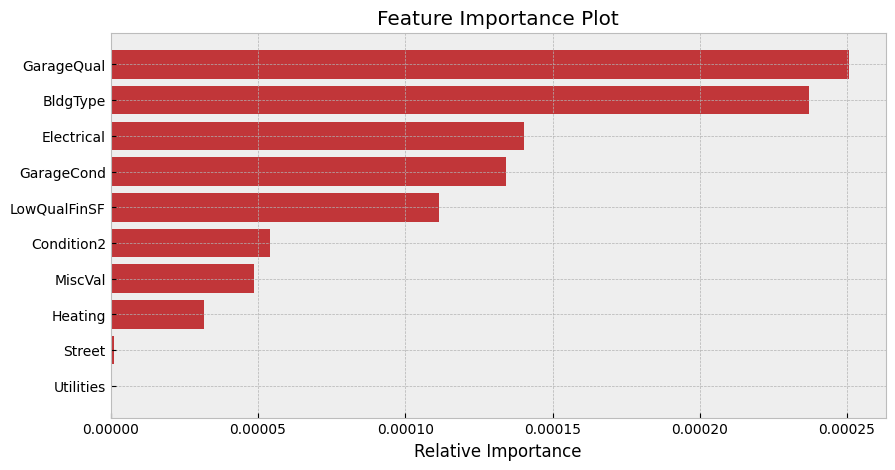

In [87]:
# Checking for the important features to the target variable 

from sklearn.ensemble import RandomForestRegressor

feat_im=RandomForestRegressor()
feat_im.fit(x, target)
feat_name=list(x.columns)
importances=feat_im.feature_importances_
indices=np.argsort(importances)[:10]

plt.figure(figsize=(10,5))
plt.barh(range(len(indices)), importances[indices],align='center')
plt.yticks(range(len(indices)), [feat_name[i] for i in indices])
plt.xlabel('Relative Importance')
plt.title('Feature Importance Plot');

These are the important features that determine the target lable which is the sales prices of homes.

In [88]:
# Splitting the dataset into training and validation sets. 

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test=train_test_split(x, target, test_size=0.33, random_state=42)


In [89]:
X_test.shape

(482, 75)

### Building my Base Model

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor 

In [92]:
# Initialize the Regreesor Models

lr_mod=LinearRegression()
r_mod=Ridge()
dc_tree=DecisionTreeRegressor()
gb_mod=GradientBoostingRegressor()

In [93]:
# Fitting Models on the training data

lr_mod.fit(X_train, y_train)
r_mod.fit(X_train, y_train)
dc_tree.fit(X_train, y_train)
gb_mod.fit(X_train, y_train)

GradientBoostingRegressor()

In [95]:
# Creating the prediction function for my Model

ols_pred=lr_mod.predict(X_test)
r_pred=r_mod.predict(X_test)
dc_pred=dc_tree.predict(X_test)
gb_pred=gb_mod.predict(X_test)

### Base Model Evaluation 

In [101]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

name = ['Linear Regression (ols)', 'Ridge Regression', 'Decision Tree Regressor', 'Gradiant Boosting Regressor']


In [113]:
# Evaluation Metrics for the Ordinary Least Square (ols) Linear Regression Model

mae=mean_absolute_error(y_test, ols_pred)
mse=mean_squared_error(y_test, ols_pred)
rmse=np.sqrt(mse)
score=r2_score(y_test, ols_pred)

print(f" The R Squared Score of the {name[0]} model, is {score} \n")
print(f" The Mean Absolute Error of the {name[0]} model, is {mae} \n")
print(f" The Mean Squared Error of the {name[0]} model, is {mse} \n")
print(f" The Root Mean Squared Error of the {name[0]} model, is {rmse} \n")

 The R Squared Score of the Linear Regression (ols) model, is 0.8071871613981523 

 The Mean Absolute Error of the Linear Regression (ols) model, is 22373.138224511415 

 The Mean Squared Error of the Linear Regression (ols) model, is 1415514507.5229673 

 The Root Mean Squared Error of the Linear Regression (ols) model, is 37623.323982909424 



In [110]:
# Evaluation Metrics for the Ridge Regression Model

mae=mean_absolute_error(y_test, r_pred)
mse=mean_squared_error(y_test, r_pred)
rmse=np.sqrt(mse)
score=r2_score(y_test, r_pred)

print(f" The R Squared Score of the {name[1]} model, is {score} \n")
print(f" The Mean Absolute Error of the {name[1]} model, is {mae} \n")
print(f" The Mean Squared Error of the {name[1]} model, is {mse} \n")
print(f" The Root Mean Squared Error of the {name[1]} model, is {rmse} \n")

 The R Squared Score of the Ridge Regression model, is 0.8078286435108992 

 The Mean Absolute Error of the Ridge Regression model, is 22321.487020514982 

 The Mean Squared Error of the Ridge Regression model, is 1410805136.2824717 

 The Root Mean Squared Error of the Ridge Regression model, is 37560.68604648312 



In [111]:
# Evaluation Metrics for the Decision Tree Regression Model

mae=mean_absolute_error(y_test, dc_pred)
mse=mean_squared_error(y_test, dc_pred)
rmse=np.sqrt(mse)
score=r2_score(y_test, dc_pred)

print(f" The R Squared Score of the {name[2]} model, is {score} \n")
print(f" The Mean Absolute Error of the {name[2]} model, is {mae} \n")
print(f" The Mean Squared Error of the {name[2]} model, is {mse} \n")
print(f" The Root Mean Squared Error of the {name[2]} model, is {rmse} \n")

 The R Squared Score of the Decision Tree Regressor model, is 0.6466942976142148 

 The Mean Absolute Error of the Decision Tree Regressor model, is 28677.039419087138 

 The Mean Squared Error of the Decision Tree Regressor model, is 2593755431.1431537 

 The Root Mean Squared Error of the Decision Tree Regressor model, is 50928.92528949687 



In [112]:
# Evaluation Metrics for the Gradient Boosting Regression Model

mae=mean_absolute_error(y_test, gb_pred)
mse=mean_squared_error(y_test, gb_pred)
rmse=np.sqrt(mse)
score=r2_score(y_test, gb_pred)

print(f" The R Squared Score of the {name[3]} model, is {score} \n")
print(f" The Mean Absolute Error of the {name[3]} model, is {mae} \n")
print(f" The Mean Squared Error of the {name[3]} model, is {mse} \n")
print(f" The Root Mean Squared Error of the {name[3]} model, is {rmse} \n")

 The R Squared Score of the Gradiant Boosting Regressor model, is 0.8450050470547342 

 The Mean Absolute Error of the Gradiant Boosting Regressor model, is 17416.87104005148 

 The Mean Squared Error of the Gradiant Boosting Regressor model, is 1137878608.4878526 

 The Root Mean Squared Error of the Gradiant Boosting Regressor model, is 33732.456306765635 



### Observation

The Gradient Boosting Regression Model had the best performance out of all the models with an R Squared Score of 0.845, MAE of 17417, MSE of 1137878606 and Root MSE of 33732. Although, the Root MSE is very high, this is the error from the actual sales price of a home in Ames Housing project in Iowa. 

### Recommendation & Conclusion 

* I trained this model with outliers in the dataset which might explain the poor performance of the model in the final prediction. A good recommendation will be to train the model without outliers and observe any improvement in the models performance.
* Additional feature engineering should be done to improve the quality of the dataset.
* A good recommendation for the linear based models will be to check the Regression Assumptions.
* Hyper parameter  tunning to improve the performance of the best model.
* Deployment of the best performing model into a production environment.
  

*** Using LabelEncoder() for cat encoding and RobustScaler() to scale the dataset. 